# Business Objective 

To predict if a student will get placed or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Data Collection

In [2]:
placement_df  = pd.read_csv(r'placement.csv',usecols=lambda c: not c.startswith('Unnamed:'))

In [3]:
placement_df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [4]:
placement_df.columns


Index(['cgpa', 'iq', 'placement'], dtype='object')

Three coluumns:-
Input variables 
are Cgpa and IQ.
Output variable is placement.

In [5]:
len(placement_df)

100

Total no. of observations is 100

# Data Pre-Processing

In [6]:
placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


There is no null  values and data type is also correct

# Exploratory Data Analysis

In [7]:
placement_df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


# Visualization

(array([ 2.,  4., 10., 19., 10., 17., 15., 12.,  6.,  5.]),
 array([3.3 , 3.82, 4.34, 4.86, 5.38, 5.9 , 6.42, 6.94, 7.46, 7.98, 8.5 ]),
 <BarContainer object of 10 artists>)

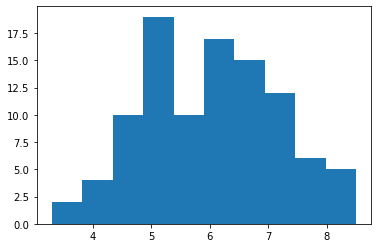

In [8]:
plt.hist(placement_df['cgpa'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


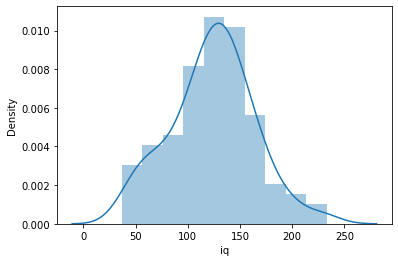

In [9]:
sns.distplot(placement_df['iq'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement', ylabel='count'>

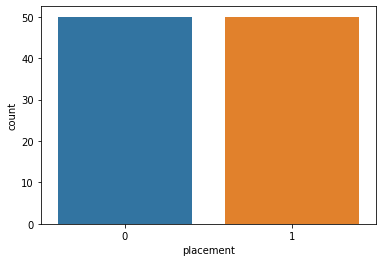

In [10]:
sns.countplot(placement_df['placement'])

In [11]:
placement_df.placement.value_counts()

0    50
1    50
Name: placement, dtype: int64

In [12]:
placement_df.corr()

,cgpa,iq,placement
cgpa,1.000000,-0.098791,0.821688
iq,-0.098791,1.000000,-0.083031
placement,0.821688,-0.083031,1.000000


In [13]:
placement_df.corr().style. background_gradient (cmap = 'BrBG')  


,cgpa,iq,placement
cgpa,1.000000,-0.098791,0.821688
iq,-0.098791,1.000000,-0.083031
placement,0.821688,-0.083031,1.000000


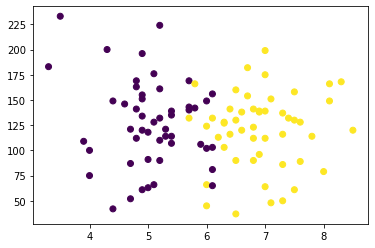

In [14]:
plt.scatter(placement_df.cgpa,placement_df.iq,c=placement_df.placement)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


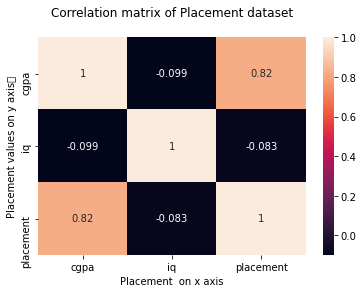

In [15]:
heatmap = sns.heatmap(placement_df.corr(), annot = True)  
heatmap.set (xlabel = 'Placement  on x axis',ylabel = 'Placement values on y axis\t', title = "Correlation matrix of Placement dataset\n")  
plt. show ()  

In [16]:
X = placement_df.iloc[:,0:2]
y= placement_df.iloc[:,-1]

In [17]:
X.shape,y.shape

((100, 2), (100,))

In [18]:
X.tail()

,cgpa,iq
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0
99,6.2,113.0


# Data Partitoning

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state=True)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70, 2), (70,), (30, 2), (30,))

# Standarization 

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [24]:
X_test = scaler.transform(X_test)


In [26]:
X_test

array([[-1.00184533,  1.8590372 ],
       [-0.29702952,  1.14936636],
       [-0.03272359,  0.62368426],
       [-0.56133545, -0.48024815],
       [ 0.67209222, -0.34882762],
       [-2.41147694,  1.51734383],
       [-0.29702952,  0.38712732],
       [ 0.40778629, -2.3201355 ],
       [ 2.16982581, -0.13855478],
       [ 1.8174179 ,  1.07051405],
       [-0.7375394 , -0.40139583],
       [-1.26615125,  0.54483195],
       [ 0.05537838, -1.58418056],
       [ 0.84829617,  1.30707099],
       [-1.0899473 ,  0.41341142],
       [ 0.84829617,  0.36084321],
       [-1.88286509, -0.42767994],
       [ 1.28880605, -1.68931698],
       [ 0.05537838, -1.16363488],
       [-0.03272359, -2.10986266],
       [-0.64943742, -0.11227068],
       [-1.00184533, -1.68931698],
       [ 0.58399024,  1.49105973],
       [-0.03272359, -0.61166867],
       [-0.7375394 ,  0.17685448],
       [ 0.67209222, -0.92707793],
       [-1.17804928, -1.92587392],
       [-0.03272359, -0.03341836],
       [-0.64943742,

# Model Selection

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf= LogisticRegression()

In [35]:
clf.fit(X_train,y_train) ## Training a model

LogisticRegression()

In [36]:
y_pred = clf.predict(X_test)

# Model Evaluation

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy = accuracy_score(y_test,y_pred)

In [43]:
accuracy

0.8666666666666667

In [47]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

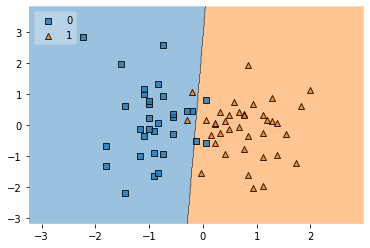

In [51]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

<AxesSubplot:>

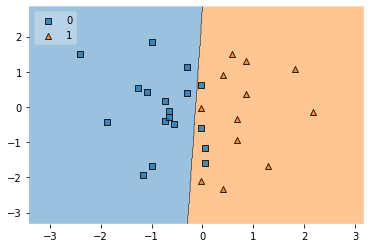

In [52]:
plot_decision_regions(X_test,y_test.values,clf=clf,legend=2)

<AxesSubplot:>

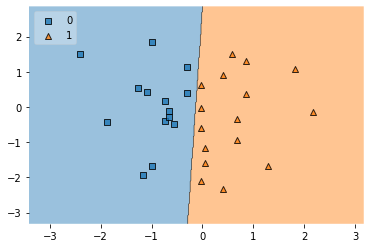

In [53]:
plot_decision_regions(X_test,y_pred,clf=clf,legend=2)

# Deployment

In [55]:
import pickle

In [58]:
pickle.dump(clf,open(r'placement.pkl','wb'))

In [60]:
clf_model = pickle.load(open(r'placement.pkl','rb'))

In [61]:
clf_model

LogisticRegression()

In [64]:
result = clf_model.score(X_test, y_test)

In [65]:
result

0.8666666666666667

In [69]:
X_test

array([[-1.00184533,  1.8590372 ],
       [-0.29702952,  1.14936636],
       [-0.03272359,  0.62368426],
       [-0.56133545, -0.48024815],
       [ 0.67209222, -0.34882762],
       [-2.41147694,  1.51734383],
       [-0.29702952,  0.38712732],
       [ 0.40778629, -2.3201355 ],
       [ 2.16982581, -0.13855478],
       [ 1.8174179 ,  1.07051405],
       [-0.7375394 , -0.40139583],
       [-1.26615125,  0.54483195],
       [ 0.05537838, -1.58418056],
       [ 0.84829617,  1.30707099],
       [-1.0899473 ,  0.41341142],
       [ 0.84829617,  0.36084321],
       [-1.88286509, -0.42767994],
       [ 1.28880605, -1.68931698],
       [ 0.05537838, -1.16363488],
       [-0.03272359, -2.10986266],
       [-0.64943742, -0.11227068],
       [-1.00184533, -1.68931698],
       [ 0.58399024,  1.49105973],
       [-0.03272359, -0.61166867],
       [-0.7375394 ,  0.17685448],
       [ 0.67209222, -0.92707793],
       [-1.17804928, -1.92587392],
       [-0.03272359, -0.03341836],
       [-0.64943742,

In [72]:
clf_model.predict([[0.40778629,0.91280942]])

array([1], dtype=int64)

In [73]:
clf_model.predict([[0.40778629,0.91280942]])[0]

1

In [84]:
def placement_result(cgpa,iq):
    transformed_value =scaler.transform([[cgpa,iq]])
    result = clf_model.predict(transformed_value)
    if(result[0]==1):
        print("Candiadte will be placed")
    else:
        print("Candidate will not be placed")

cgpa range 1 - 10,
iq range = 1 - 300

In [85]:
placement_result(10, 100)

Candiadte will be placed


In [86]:
placement_result(3.4, 200)

Candidate will not be placed
